In [2]:
%matplotlib inline
import sys; sys.path.append(_dh[0].split("visualize patterns")[0] + "visualize patterns")
from lib import *
from lib import db

In [3]:
docs = get_cnt("doc")
cits = get_cnt("wos.all.uid.ind")

loading from ../120 _ count co-occurrences/THEORY_DB/cnt_doc.pickle
dict_keys(['j', 'y', 'jy', 'wos_jy', 'wos_y', 'a', 'ay', 'aj', 'ajy', 'age.jy', 'age', 'age.y', 'age.j'])
loading from ../120 _ count co-occurrences/wos_counter_larger/cnt_ind_fullUnique.pickle
dict_keys(['fj', 'fy', 'ty', 'fy.ty', 'fj.ty', 'jy', 'a', 'ay', 'aj', 'ajy', 'ac', 'c', 'cy', 'cj', 'cjy'])


In [5]:
aysum = load_variable("aysum")

In [6]:
plt.style.use('grayscale')

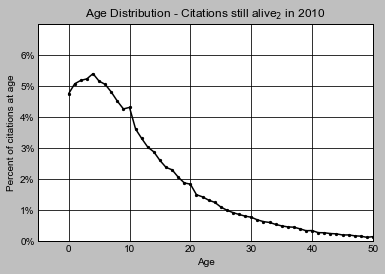

In [22]:
birth_key = 'pub'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

YRLOOK = 2010

bdays = [YRLOOK-born(x) for x in cysum.values() if (((died(x) is None) or (died(x) >= YRLOOK)) and born(x) <= YRLOOK)]
yrs_none = Counter(bdays)

num = len(bdays)

years = range(0,100,1)
props = np.array([yrs_none[x] for x in years])
props = props/np.sum(props)
props *= 100

plt.plot(
    years,
    props,
    #label="%s (%s)" % (YRLOOK,num)
);
plt.scatter(years,props,s=5)

plt.title("Age Distribution - Citations still alive$_2$ in 2010")
plt.xlim((-5,50))
plt.ylim((0,7))
plt.yticks(
    range(0,7,1),
    ["%s%%"%x for x in range(0,7,1)]
)
plt.ylabel("P(Age)")
plt.xlabel("Age")

save_figure("cit.agedist")
#plt.legend()
plt.show()

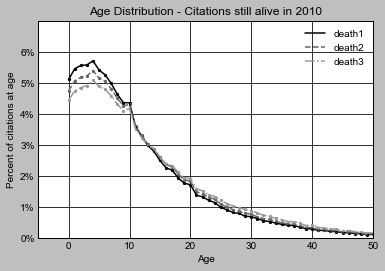

In [23]:
birth_key = 'pub'
death_keys = ['death1','death2','death3']

born = lambda x: x[birth_key]

YRLOOK = 2010

linestyles = ['-','--','-.']

for dki, death_key in enumerate(death_keys):
    died = lambda x: x[death_key]
    bdays = [YRLOOK-born(x) for x in cysum.values() if (((died(x) is None) or (died(x) >= YRLOOK)) and born(x) <= YRLOOK)]
    yrs_none = Counter(bdays)

    num = len(bdays)

    years = range(0,100,1)
    props = np.array([yrs_none[x] for x in years])
    props = props/np.sum(props)
    props *= 100

    plt.plot(
        years,
        props,
        label=death_key,
        linestyle = linestyles[dki]
        #label="%s (%s)" % (YRLOOK,num)
    );
    #plt.scatter(years,props,s=5)

plt.title("Age Distribution - Citations still alive in 2010")
plt.xlim((-5,50))
plt.ylim((0,7))
plt.yticks(
    range(0,7,1),
    ["%s%%"%x for x in range(0,7,1)]
)
plt.ylabel("Percent of citations at age")
plt.xlabel("Age")

save_figure("cit.agedist.multi")
plt.legend()
plt.show()

# authors

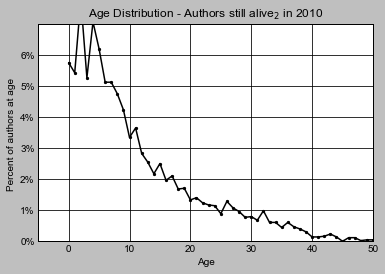

In [21]:
birth_key = 'first'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

YRLOOK = 2010

bdays = [YRLOOK-born(x) for x in aysum.values() if (((died(x) is None) or (died(x) >= YRLOOK)) and born(x) <= YRLOOK)]
yrs_none = Counter(bdays)

num = len(bdays)

years = range(0,100,1)
year_died_counts = np.array([yrs_none[x] for x in years])
total = np.sum(year_died_counts)
props = year_died_counts/np.sum(year_died_counts)

se = np.sqrt((props * (1-props))/total)

percents = props*100

plt.plot(
    years,
    percents,
    #label="%s (%s)" % (YRLOOK,num)
);
plt.scatter(years,percents,s=5)
#plt.errorbar(years,percents,se*100)

plt.title("Age Distribution - Authors still alive$_2$ in 2010")
plt.xlim((-5,50))
plt.ylim(0,7)
plt.yticks(
    range(0,7,1),
    ["%s%%"%x for x in range(0,7,1)]
)
plt.ylabel("Percent of authors at age ")
plt.xlabel("Age")

save_figure("auth.agedist")

#plt.legend()
plt.show()

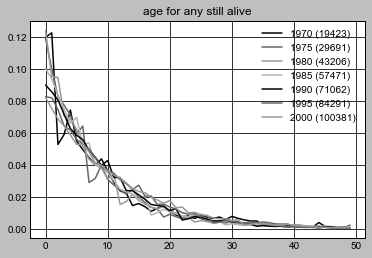

In [8]:
birth_key = 'first'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

for YRLOOK in range(1970, 2005, 5):
    bdays = [YRLOOK-born(x) for x in cysum.values() if (((died(x) is None) or (died(x) >= YRLOOK)) and born(x) <= YRLOOK)]
    yrs_none = Counter(bdays)
    
    num = len(bdays)

    years = range(0,50,1)
    props = np.array([yrs_none[x] for x in years])
    props = props/np.sum(props)

    plt.plot(
        years,
        props,
        label="%s (%s)" % (YRLOOK,num)
    );

plt.title("age for any still alive")

plt.legend()
plt.show()

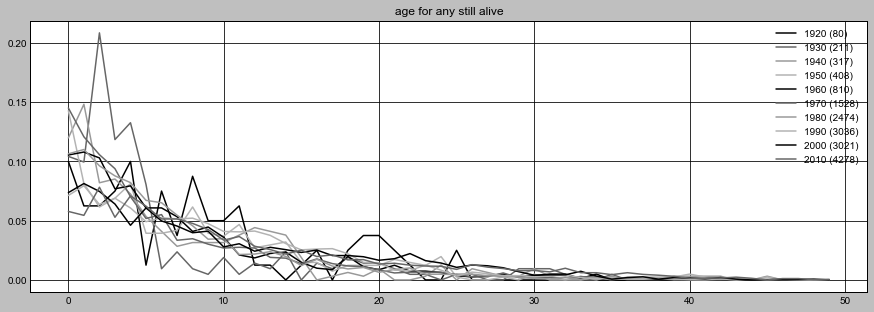

In [9]:
birth_key = 'first'
plt.figure(figsize=(15,5))

for YRLOOK in range(1920, 2020, 10):
    bdays = [YRLOOK-born(x) for x in aysum.values() if (((died(x) is None) or (died(x) >= YRLOOK)) and born(x) <= YRLOOK)]
    yrs_none = Counter(bdays)
    
    num = len(bdays)

    years = range(0,50,1)
    props = np.array([yrs_none[x] for x in years])
    props = props/np.sum(props)

    plt.plot(
        years,
        props,
        label="%s (%s)" % (YRLOOK,num)
    );

plt.title("age for any still alive")

plt.legend()
plt.show()

# what percent born in X year are now dead?

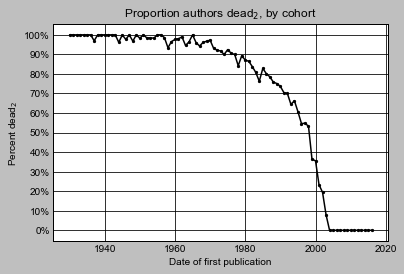

In [10]:
birth_key = 'first'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

years = range(1930, 2020)
pdied = {
    y: Counter( (died(x) is not None) for x in aysum.values() if x['first']==y ) + 
        Counter( "total" for x in aysum.values() if x['first']==y )
    for y in years
}

props = np.array([ pdied[y][True]/pdied[y]['total'] if pdied[y]['total'] else float('nan') for y in years ])


plt.plot(
    years,
    props*100,
    #label="%s (%s)" % (YRLOOK,num)
);
plt.scatter(years,props*100,s=5)
#plt.errorbar(years,percents,se*100)

plt.title("Proportion authors dead$_2$, by cohort")
plt.yticks(
    range(0,110,10),
    ["%s%%"%x for x in range(0,110,10)]
)
plt.ylabel("Percent dead$_2$")
plt.xlabel("Date of first publication")

save_figure("auth.prop dead by cohort")

#plt.legend()
plt.show()

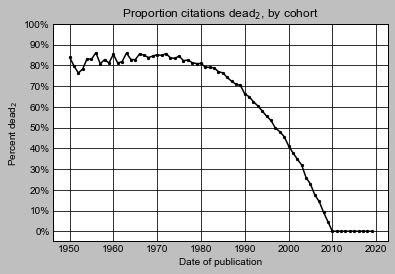

In [11]:
birth_key = 'pub'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

years = range(1950, 2020)
pdied = {
    y: Counter( (died(x) is not None) for x in cysum.values() if x['first']==y ) + 
        Counter( "total" for x in cysum.values() if x['first']==y )
    for y in years
}

props = np.array([ pdied[y][True]/pdied[y]['total'] for y in years ])


plt.plot(
    years,
    props*100,
    #label="%s (%s)" % (YRLOOK,num)
);
plt.scatter(years,props*100,s=5)
#plt.errorbar(years,percents,se*100)

plt.title("Proportion citations dead$_2$, by cohort")
plt.yticks(
    range(0,110,10),
    ["%s%%"%x for x in range(0,110,10)]
)
plt.ylabel("Percent dead$_2$")
plt.xlabel("Date of publication")


save_figure("cit.prop dead by cohort")

#plt.legend()
plt.show()

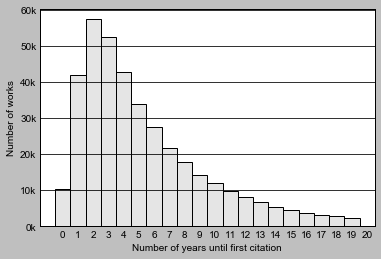

In [43]:
cc = Counter(x['first'] - x['pub'] for x in cysum.values() )
x = range(0,20,1)
plt.bar(
    x,
    [cc[xx] for xx in x],
    1,
    alpha=0.1
)

plt.bar(
    x,
    [cc[xx] for xx in x],
    1,
    color='black',
    fill=False,
    linestyle='-'
)

ys = range(0,70000, 10000)
plt.yticks(
    ys,
    ["%dk"%(x//1000) for x in ys]
)

plt.xticks(
    range(0,21,1)
);

plt.grid(False, axis='x')

plt.ylabel("Number of works")
plt.xlabel("Number of years until first citation");

save_figure("SB-time lag")

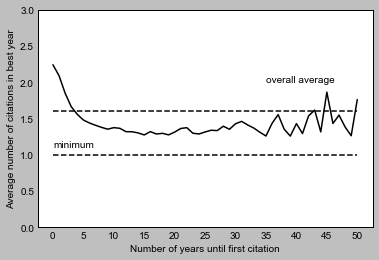

In [13]:
cc = defaultdict(list)
for x in cysum.values():
    cc[x['first'] - x['pub']].append(x['maxcount'])

x = range(0,51,1)
plt.plot(
    x,
    [np.mean(cc[xx]) for xx in x],
)

plt.xticks(
    range(0,55,5)
);

plt.grid(False)

plt.ylabel("Average number of citations in best year")
plt.xlabel("Number of years until first citation");
plt.ylim((0,3));

plt.text(35,2,"overall average")
plt.hlines(np.mean(sum(cc.values(), [])), 0, 50, linestyle='--')
plt.text(0,1.1,"minimum")
plt.hlines(1, 0, 50, linestyle='--')

save_figure("SB-best years")

In [14]:
cydb = pd.DataFrame.from_records(list(cysum.values()))

In [15]:
cydb['years_sleep'] = cydb['first']-cydb['pub']

cydb = cydb[ cydb['years_sleep'] > 10 ]
cydb = cydb[ cydb['maxcount'] >= 5 ]
cydb = cydb[ cydb['pub'] >= 1950 ]
cydb.loc[:,['pub','first','maxcount','total','name','years_sleep']].sort_values("total", ascending=False)[:30]

,pub,first,maxcount,total,name,years_sleep
3156,1956,1968,50,1128,garfinkel|studies ethnometholo,12
384,1954,1982,40,947,foucault|powerknowledge selec,28
903,1960,1991,55,899,coleman|fdn social sci theor,31
1890,1963,1984,36,749,hochschild|the managed heart co,21
11959,1955,1969,31,719,goffman|interaction,14
5082,1970,1992,54,688,bourdieu|logic of practice,22
2454,1954,1965,28,614,gordon|assimiliation am lif,11
4488,1986,2002,58,519,"bourdieu|1986| hdb theory res socio, p241",16
6224,1960,1990,33,508,butler|gender trouble gende,30
6323,1988,2001,54,469,muthen|mplus users guide co,13


# demographic tables - authors

In [23]:
birth_key = 'first'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

ranges = [(0,1),(1,2),(2,3),(3,4),(4,5), (0,5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30)]
"""[
    (0,2),
    (2,5),
    (5,10),
    (10,20),
    (20,None)
]"""

rows = []
rows_cnt = []
dta = {}
dtap = {}

YRLOOKS = range(1930, 2015, 5)
for YRLOOK in YRLOOKS:
    row = [YRLOOK]
    row_cnt = [YRLOOK]
    bdays = np.array([
        YRLOOK-born(x) 
        for x in aysum.values() if 
        (
            ((died(x) is None) or (died(x) >= YRLOOK)) and 
            born(x) <= YRLOOK
        )
    ])
    
    for i,(f,t) in enumerate(ranges):
        nmy = np.sum(np.logical_and(
            bdays >= f,
            np.array([i+1==len(ranges) or bday < t for bday in bdays])
        ))
        
        row.append("%00.f%%"%(100*nmy/bdays.size))
        row_cnt.append(nmy)
        dta[(YRLOOK, (f,t))] = nmy
        dtap[(YRLOOK, (f,t))] = 100*nmy/bdays.size
        
    rows.append(row)
    rows_cnt.append(row_cnt)

display(HTML("<h3>Percentages</h3>"))
display(HTML(tabulate(rows, tablefmt='html', 
                      headers=['year']+['`%s-%s'%(f,t) for f,t in ranges[:-1]] + ["%s+"%ranges[-1][0]])))#,'0-5','5-10','10-20','20+']

display(HTML("<h3>Counts</h3>"))
display(HTML(tabulate(rows_cnt, tablefmt='html', 
                      headers=['year']+['`%s-%s'%(f,t) for f,t in ranges[:-1]] + ["%s+"%ranges[-1][0]])))#,'0-5','5-10','10-20','20+']

year,`0-1,`1-2,`2-3,`3-4,`4-5,`0-5,`5-10,`10-15,`15-20,`20-25,25+
1930,10%,10%,21%,12%,13%,66%,13%,7%,6%,3%,5%
1935,9%,8%,6%,9%,6%,39%,38%,8%,6%,4%,6%
1940,12%,15%,8%,9%,7%,51%,19%,19%,3%,3%,6%
1945,7%,8%,8%,10%,6%,40%,29%,10%,14%,1%,5%
1950,14%,8%,6%,7%,8%,43%,22%,17%,6%,8%,4%
1955,11%,11%,10%,10%,8%,50%,22%,12%,8%,3%,5%
1960,10%,11%,10%,8%,8%,47%,26%,12%,6%,4%,4%
1965,11%,13%,8%,7%,7%,46%,25%,14%,7%,4%,4%
1970,14%,12%,11%,9%,7%,53%,20%,12%,7%,3%,4%
1975,13%,13%,11%,9%,7%,53%,24%,11%,7%,3%,3%


year,`0-1,`1-2,`2-3,`3-4,`4-5,`0-5,`5-10,`10-15,`15-20,`20-25,25+
1930,22,21,44,25,28,140,27,15,12,7,10
1935,22,21,16,23,15,97,96,19,15,10,14
1940,38,47,26,27,23,161,59,61,10,8,18
1945,25,26,28,35,20,134,97,34,47,5,18
1950,58,33,25,28,33,177,90,70,25,31,15
1955,61,60,56,56,47,280,121,66,43,18,29
1960,85,87,83,62,64,381,210,98,52,34,35
1965,114,139,88,75,69,485,266,146,73,39,47
1970,221,184,161,143,107,816,313,181,104,52,62
1975,252,259,219,178,136,1044,468,215,129,65,57


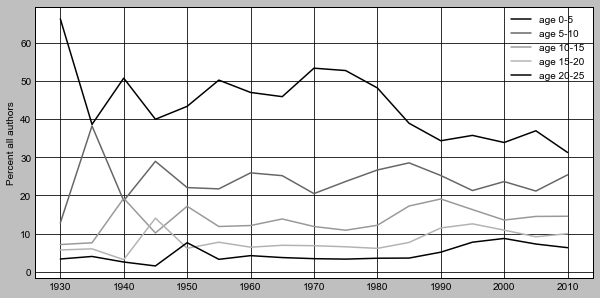

In [17]:
plt.figure(figsize=(10,5))

for i,r in enumerate(ranges[5:10]):
    
    lablab = "age %s-%s" % r
    if i+1==len(ranges):
        lablab = "age %s+" % r[0]
    plt.plot(
        YRLOOKS,
        [dtap[(y,r)] for y in YRLOOKS], 
    label=lablab)
    
plt.legend()
plt.ylabel("Percent all authors");
save_figure("compauth.age.year")

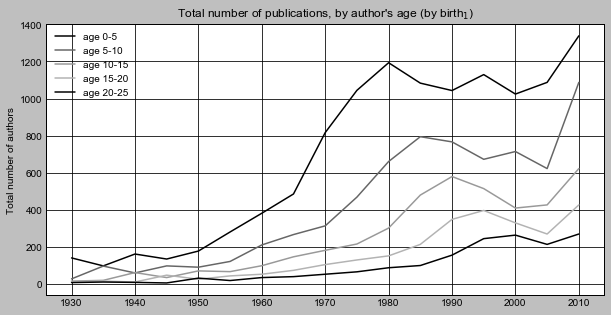

In [18]:
plt.figure(figsize=(10,5))
for i,r in enumerate(ranges[5:10]):
    
    lablab = "age %s-%s" % r
    if i+1==len(ranges):
        lablab = "age %s+" % r[0]
    plt.plot(
        YRLOOKS,
        [dta[(y,r)] for y in YRLOOKS], 
    label=lablab)
    
plt.legend()
plt.ylabel("Total number of authors");
plt.title("Total number of publications, by author's age (by birth$_1$)");

save_figure("totalauth.age.year")

# demographic tables: citations

In [19]:
print(list(zip(range(0,30,5), range(5,35,5))))

[(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30)]


In [58]:
birth_key = 'pub'
death_key = 'death2'

born = lambda x: x[birth_key]
died = lambda x: x[death_key]

ranges = [(0,1),(1,2),(2,3),(3,4),(4,5)] + list(zip(range(0,40,5),range(5,45,5)))
"""[
    (0,2),
    (2,5),
    (5,10),
    (10,20),
    (20,None)
]"""

rows = []
rows_cnt = []
dta = {}
dtap = {}

YRLOOKS = range(1930, 2015, 5)
for YRLOOK in YRLOOKS:
    row = [YRLOOK]
    row_cnt = [YRLOOK]
    
    ages_at_yrlook = np.array([
        YRLOOK-born(x) 
        for x in cysum.values() 
        if (
            ((died(x) is None) or (died(x) >= YRLOOK)) and 
            born(x) <= YRLOOK
        )
    ])
    
    for i,(range_start,range_end) in enumerate(ranges):
        nmy = np.sum(np.logical_and(
            ages_at_yrlook >= range_start, # death date must be after now...
            np.array([
                (i+1==len(ranges) or #if it's the last row, implement the "+"
                age < range_end) # othersie, make sure age < range_end at yrlook
                for age in ages_at_yrlook])
        ))
        
        row.append("%00.f%%"%(100*nmy/ages_at_yrlook.size))
        
        # 34k
        if nmy < 1000:
            row_cnt.append(nmy)
        else:
            row_cnt.append("%dk"%(nmy//1000))
        
        dta[(YRLOOK, (range_start,range_end))] = nmy
        dtap[(YRLOOK, (range_start,range_end))] = 100*nmy/ages_at_yrlook.size
        
    rows.append(row)
    rows_cnt.append(row_cnt)

display(HTML("<h3>Percentages</h3>"))
display(HTML(tabulate(rows, tablefmt='html', 
                      headers=['year']+['%s-%s'%(f,t) for f,t in ranges[:-1]] + ["%s+"%ranges[-1][0]])))#,'0-5','5-10','10-20','20+']

display(HTML("<h3>Counts</h3>"))
display(HTML(tabulate(rows_cnt, tablefmt='html', 
                      headers=['year']+['%s-%s'%(f,t) for f,t in ranges[:-1]] + ["%s+"%ranges[-1][0]])))#,'0-5','5-10','10-20','20+']

year,0-1,1-2,2-3,3-4,4-5,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35+
1930,4%,4%,4%,4%,4%,20%,14%,8%,9%,10%,8%,6%,25%
1935,5%,5%,4%,4%,4%,21%,16%,11%,7%,7%,8%,6%,25%
1940,5%,4%,5%,4%,4%,22%,16%,12%,9%,5%,6%,6%,24%
1945,3%,3%,3%,3%,3%,17%,18%,13%,10%,7%,4%,5%,26%
1950,6%,5%,4%,4%,3%,22%,13%,14%,10%,8%,6%,3%,25%
1955,6%,6%,5%,5%,4%,26%,16%,9%,10%,7%,6%,4%,21%
1960,7%,6%,6%,5%,5%,28%,19%,11%,6%,7%,5%,4%,19%
1965,7%,7%,6%,6%,5%,30%,20%,13%,8%,4%,5%,4%,16%
1970,8%,7%,7%,6%,5%,33%,20%,13%,8%,5%,3%,3%,14%
1975,7%,7%,7%,6%,6%,33%,22%,13%,8%,5%,3%,2%,12%


year,0-1,1-2,2-3,3-4,4-5,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35+
1930,256,236,239,241,218,1k,824,489,519,561,440,341,1k
1935,351,335,284,274,265,1k,1k,813,484,514,560,438,1k
1940,432,386,437,392,353,2k,1k,1k,796,475,511,559,2k
1945,362,340,350,347,371,1k,1k,1k,1k,781,468,505,2k
1950,767,635,560,500,456,2k,1k,1k,1k,1k,765,459,3k
1955,1k,1k,918,842,767,4k,2k,1k,1k,1k,1k,752,3k
1960,1k,1k,1k,1k,1k,6k,4k,2k,1k,1k,1k,1k,4k
1965,2k,2k,1k,1k,1k,9k,6k,4k,2k,1k,1k,1k,5k
1970,3k,3k,3k,2k,2k,15k,9k,5k,3k,2k,1k,1k,6k
1975,4k,4k,4k,4k,3k,20k,13k,8k,5k,3k,2k,1k,7k


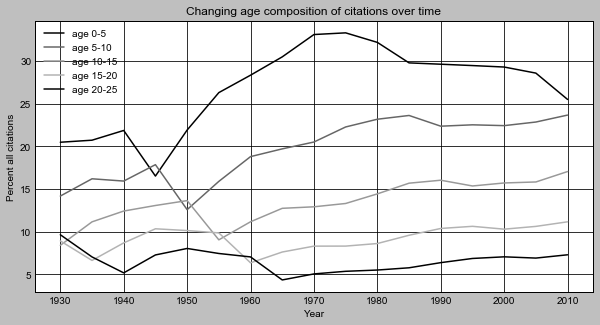

In [59]:
plt.figure(figsize=(10,5))
for i,r in enumerate(ranges[5:10]):
    
    lablab = "age %s-%s" % r
    if i+1==len(ranges):
        lablab = "age %s+" % r[0]
    plt.plot(
        YRLOOKS,
        [dtap[(y,r)] for y in YRLOOKS], 
    label=lablab)
    
plt.legend()
plt.ylabel("Percent all citations");
plt.xlabel("Year")
plt.title("Changing age composition of citations over time")
save_figure("compcit.age.year")

In [69]:
BDB = db['bibWoS']

In [71]:
BDB.find_one().keys()

dict_keys(['_id', 'doc', 'a', 'fy', 'j', 'ref', 'ref_full', 'refy'])

In [72]:
len(BDB.distinct("doc"))

91925

In [80]:
groups1 = load_variable("groups.books")

In [81]:
groups2 = load_variable("groups.articles")

In [82]:
len(groups1)

189514

In [85]:
len(set(groups1.values()))

167709

In [86]:
print(list(groups2.items())[:10])

[('granovetter|1973| am j sociol, v78, p1360', 0), ('granovetter|1973| am j sociol, v78, p360', 0), ('granovetter|1973| am j sociol, v78, p1361', 0), ('granovetter|1973| am j sociol, v73, p1361', 0), ('coleman|1988| am j sociol, v94, ps95', 1), ('coleman|1988| am j sociol, v94, ps94', 1), ('west|1987| gender soc, v1, p125', 2), ('west|1987| gender soc, v1, p124', 2), ('west|1987| gender soc, v1, p121', 2), ('swidler|1986| am sociol rev, v51, p273', 3)]


In [89]:
len(groups2)

235475

In [88]:
len(set(groups2.values()))

233632

In [76]:
len(groups)

NameError: name 'groups' is not defined

In [75]:
len([x for x in cits['fj'] if cits['fj'][x]>0])

113

In [64]:
len(cysum)

401332

In [63]:
sum(x['total'] for x in cysum.values())

2444593

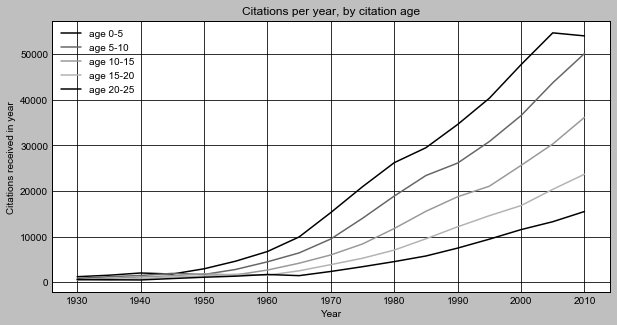

In [60]:
plt.figure(figsize=(10,5))
for i,r in enumerate(ranges[5:10]):
    
    lablab = "age %s-%s" % r
    if i+1==len(ranges):
        lablab = "age %s+" % r[0]
    plt.plot(
        YRLOOKS,
        [dta[(y,r)] for y in YRLOOKS], 
    label=lablab)
    
plt.legend()
plt.ylabel("Citations received in year");
plt.title("Citations per year, by citation age");
plt.xlabel("Year")

save_figure("totalcit.age.year")